In [2]:
#### Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import math


In [5]:
#### Define singal

Fs = 2000                  # Sampling Frequency
T  = 1/Fs                  # Sampling interval time (resolution)
te = 2                     # End of time
t  = np.arange(0, te, T)   # Time Vector

# Sump of a 50 Hz sinusoid and a 120 Hz sinusoid
noise = np.random.normal(0, 0.05, len(t))
x     = 0.6 * np.cos(2 * np.pi * 60 * t+np.pi/2) + np.cos(2 * np.pi * 120 * t)
y     = x + noise     # Sinousoid + Noise

y.shape
y[3999]

1.0406299527834428

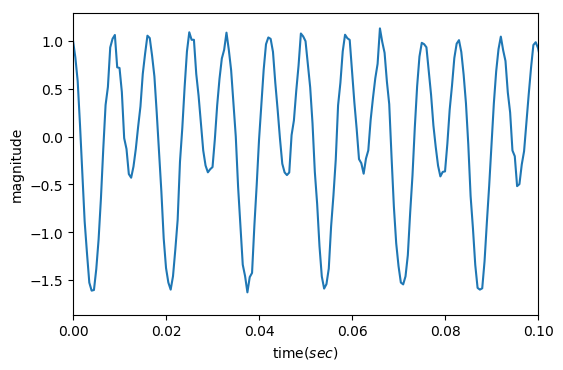

In [4]:
#### Plot signal

plt.figure(num=1, dpi=100, facecolor='white')
plt.plot(t,y)
plt.xlim(0, 0.1)
plt.xlabel('time($sec$)')
plt.ylabel('magnitude')
plt.savefig("./test_figure1.png", dpi=300)


In [5]:
#### Compute FFT

NFFT   =  len(y)                              # length of signal > NFFT = 2 ^ nextpow2(length(y)) 
k      =  np.arange(NFFT)
f0     =  k * Fs / NFFT                    # Double sides Frequency range
f0     =  f0[range(math.trunc(NFFT/2))]    # Single side  Frequency range

Y      =  np.fft.fft(y)/NFFT             # FFT computing and normalization
Y      =  Y[range(math.trunc(NFFT/2))]   # Single side  Frequency range
amp_Hz =  2 * abs(Y)
phase_ang = np.angle(Y) * 180/np.pi

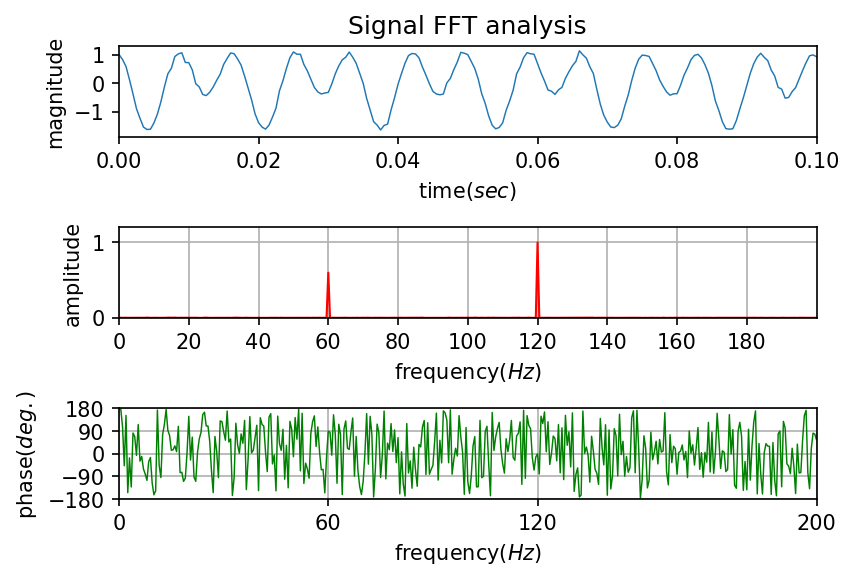

In [6]:
#### Plot FFT Result

plt.figure(num=2, dpi=150, facecolor='white')
plt.subplots_adjust(hspace = 1, wspace = 0.1)

plt.subplot(3,1,1)
plt.plot(t,y, lw=0.7)
plt.title('Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('magnitude')
plt.xlim(0, 0.1)

plt.subplot(3,1,2)
plt.plot(f0,amp_Hz,'r', lw=1)
plt.xlim(0, 200)
plt.ylim(0, 1.2)
plt.xticks(np.arange(0,200,20))
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'g', lw=0.7)
plt.xlim(0, 200)
plt.ylim(-180, 180)
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.grid()

plt.savefig("./test_figure2.png", dpi=300)
plt.show()